      Voltage (p.u.)  Angle (°)
0           1.006262 -11.251648
1           1.049885 -14.555979
2           1.062921 -15.239909
3           1.052286 -13.362613
4           1.090663 -13.595538
5           1.011777   0.984969
6           1.053256 -14.453605
7           1.063922 -12.941613
8           1.062302 -15.609116
9           1.049650 -15.482233
10          1.049453 -14.286618
11          1.050868 -14.525885
12          1.057324 -15.236728
13          1.047222 -13.150696
14          1.088842 -13.102720
15          1.049983 -13.313740
16          1.054297  -7.077587
17          1.051908 -15.232999
18          1.027670 -11.632764
19          1.035130 -16.036237
20          1.070894 -13.359256
21          1.054925 -14.404016
22          1.055252 -17.330294
23          1.046768 -14.528342
24          1.047745 -16.755038
25          1.054778 -15.428243
26          1.048541 -14.467848
27          1.045403 -13.472864
28          1.058031 -14.134671
29          1.049877 -13.326928
30      

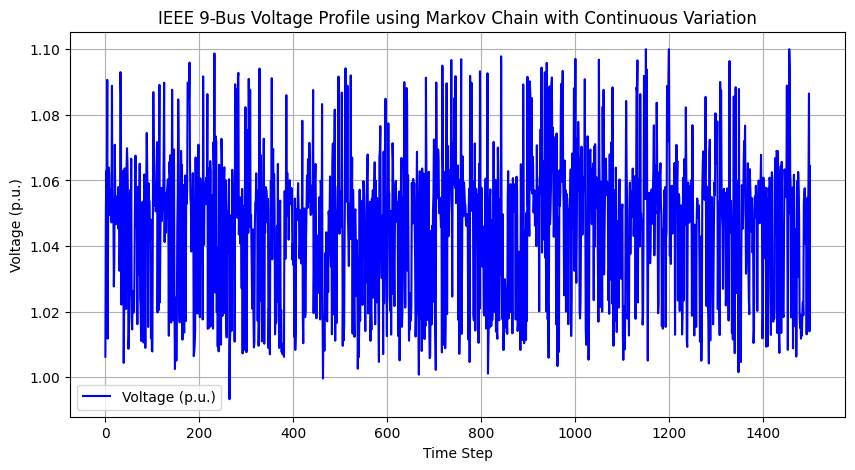

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given 9 pairs of Voltage (p.u.) and Angle (°)
voltage_angle_pairs = np.array([
    (1.0160, 0.0), (1.045, -4.8), (1.010, -12.72), (1.019, -10.33),
    (1.020, -8.78), (1.070, -14.22), (1.062, -13.37), (1.090, -13.36), (1.056, -14.94),(1.051, -15.10),(1.057, -14.79),(1.055, -15.16),(1.050,-15.16),(1.036,-16.04)
])

num_states = len(voltage_angle_pairs)

# Define a Random Transition Matrix (Each Row Sums to 1)
import numpy as np

transition_matrix = np.array([
    [0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    [0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    [0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    [0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    [0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    [0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    [0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.05],
    [0.05, 0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05],
    [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05, 0.05],
    [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05, 0.05],
    [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 , 0.05],
    [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15, 0.1 ],
    [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 , 0.15],
    [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1 , 0.15, 0.2 ]
])

# Normalize Transition Matrix
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Function to Generate Data Using Markov Chain with Variations
def generate_continuous_markov_data(pairs, transition_matrix, num_samples=1000, voltage_std=0.005, angle_std=1.0):
    data = []
    current_index = np.random.choice(range(num_states))  # Random Initial State
    
    for _ in range(num_samples):
        # Get current state (voltage, angle)
        voltage, angle = pairs[current_index]

        # Add small random variation to voltage and angle
        voltage += np.random.normal(0, voltage_std)  # Small voltage variation
        angle += np.random.normal(0, angle_std)  # Small angle variation

        # Ensure voltage stays in a reasonable range (Optional, for stability)
        voltage = max(0.90, min(1.10, voltage))  

        # Append new (V, θ) values
        data.append((voltage, angle))

        # Move to the next state based on Markov transition
        current_index = np.random.choice(range(num_states), p=transition_matrix[current_index])
    
    return np.array(data)

# Generate 1000 Samples with Variations
num_samples = 1500
synthetic_data = generate_continuous_markov_data(voltage_angle_pairs, transition_matrix, num_samples)

# Convert Data to DataFrame
df = pd.DataFrame(synthetic_data, columns=["Voltage (p.u.)", "Angle (°)"])

# Display ALL 1000 Rows
pd.set_option("display.max_rows", None)  # Enable full display
print(df)

# Save to CSV
df.to_csv("synthetic_voltage_angle_data_continuous.csv", index=False)

# Plot Voltage Profile
plt.figure(figsize=(10, 5))
plt.plot(df["Voltage (p.u.)"], label="Voltage (p.u.)", color="blue")
plt.xlabel("Time Step")
plt.ylabel("Voltage (p.u.)")
plt.title("IEEE 14-Bus Voltage Profile using Markov Chain with Continuous Variation")
plt.legend()
plt.grid()
plt.show()

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load dataset from Excel
file_path = "C:\\Users\\as310\\Downloads\\bus_voltage_angle_data.xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Extract Voltage and Angle columns
X = data[["Voltage", "Angle"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Plot the clustering result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data["Voltage"], data["Angle"], c=data["Cluster_DBSCAN"], cmap="rainbow", alpha=0.7)
plt.xlabel("Voltage ")
plt.ylabel("Angle ")
plt.title("DBSCAN Clustering of Voltage & Angle")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values